In [12]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import random

In [23]:
print(len(np.arange(0,1,100)))
len(np.random.normal(90,10,100))
[i for i in np.arange(0,1,100)]

1


[0]

In [25]:

# Assuming you have a DataFrame 'df' with columns: "customerid", "Month of Reference", "CLTV Before", "CLTV After"

# Example DataFrame (you would replace this with your actual data)
data = {
    'customerid': [1, 2, 3, 4, 5],
    'Month of Reference': ['2021-01', '2021-01', '2021-01', '2021-01', '2021-01'],
    'CLTV Before': [100, 200, 150, 300, 250],
    'CLTV After': [120, 210, 155, 310, 265]
}

data = {

    'CLTV Before': np.random.normal(100,10,100),
    'CLTV After': np.random.normal(90,10,100)
}



df = pd.DataFrame(data)

# Calculate the difference in CLTV
df['CLTV Difference'] = df['CLTV After'] - df['CLTV Before']

# Perform a Paired T-Test
t_statistic, p_value = stats.ttest_rel(df['CLTV After'], df['CLTV Before'])

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in CLTV.")
else:
    print("There is no statistically significant difference in CLTV.")



T-Statistic: -6.41743139834302
P-Value: 4.8048024720174946e-09
There is a statistically significant difference in CLTV.


<Axes: xlabel='CLTV Difference', ylabel='Count'>

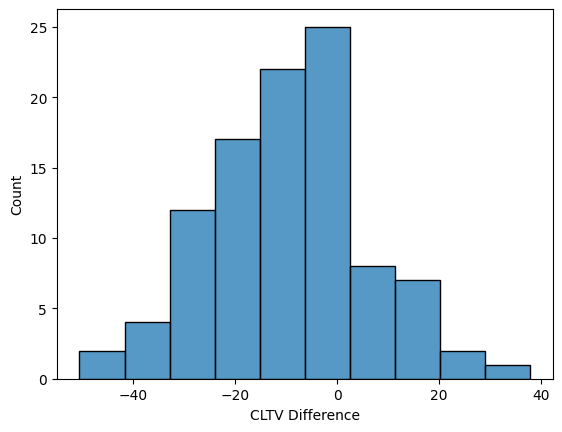

In [26]:


# Continuing from the previous analysis

# Calculating the 95% confidence interval for the difference
mean_difference = df['CLTV Difference'].mean()
std_dev_difference = df['CLTV Difference'].std(ddof=1)
n = len(df)

# Standard error of the mean difference
sem = std_dev_difference / np.sqrt(n)

# t-critical value for 95% confidence
t_critical = stats.t.ppf(1 - 0.05 / 2, df=n-1)

# Margin of error
margin_of_error = t_critical * sem

# Confidence interval
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

sns.histplot(df["CLTV Difference"], bins = 10)